In [1]:
import numpy as np
import tensorflow as tf #biblioteca usada para rede reurais
from tensorflow.keras.models import Sequential #modelo sequencial(camada empilhada)
from tensorflow.keras.layers import SimpleRNN, Dense #camada de neuronior: RNN simples e camadas de saida dense
from sklearn.model_selection import train_test_split #separa os dados de treino e teste
import matplotlib.pyplot as plt # para gera grafico

#simulação de dados climaticos do norte
num_samples = 1000 #quantidade de semana simuladas
sequence_lenght = 7 #cada entrada terá 7 dias consecutivos
features = 3 #cada entrada te 3 varieavel: temperatura, umidade e pressão

x = np.random.rand(num_samples,sequence_lenght,features)# dados aleatorios representados (entrada)

labels = (x[:, :, 1].mean(axis=1) > 0.5).astype(int) #rotula: se aumidade for maior  QUE  0.5 - choveu(1), senão (0)
#separação de grupos de teste e treino
X_train, X_teste, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=12)

model = Sequential() #Modelo sequecial
model.add(SimpleRNN(32,input_shape=(sequence_lenght,features), activation='tanh')) # camadas de 32 neuronios usando as 
#informações de entrada a função de ativaçao tanh(tangente hiperbolica)
model.add(Dense(1, activation = 'sigmoid')) # camada de saida binaria usando a função sigmold

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/15


C:\Users\NOITE-CITHA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6551 - loss: 0.6216 - val_accuracy: 0.8000 - val_loss: 0.4771
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7825 - loss: 0.4547 - val_accuracy: 0.8000 - val_loss: 0.4231
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7988 - loss: 0.4364 - val_accuracy: 0.8062 - val_loss: 0.3964
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8388 - loss: 0.3722 - val_accuracy: 0.8250 - val_loss: 0.3743
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8329 - loss: 0.3424 - val_accuracy: 0.8500 - val_loss: 0.3597
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8778 - loss: 0.3118 - val_accuracy: 0.8562 - val_loss: 0.3426
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8856 - loss: 0.2970 - val_accuracy: 0.8625 - val_loss: 0.3326
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8787 - loss: 0.2921 - val_accuracy: 0.8813 - val_loss: 0.3262
Epo

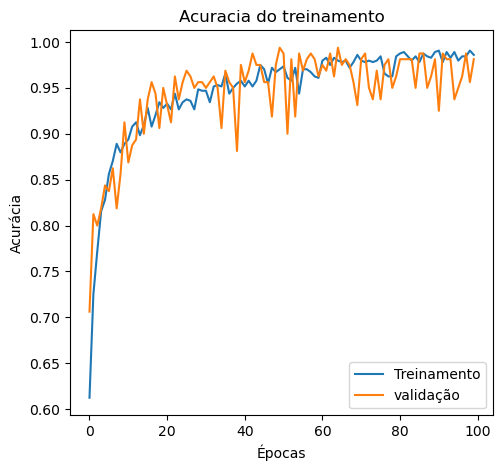

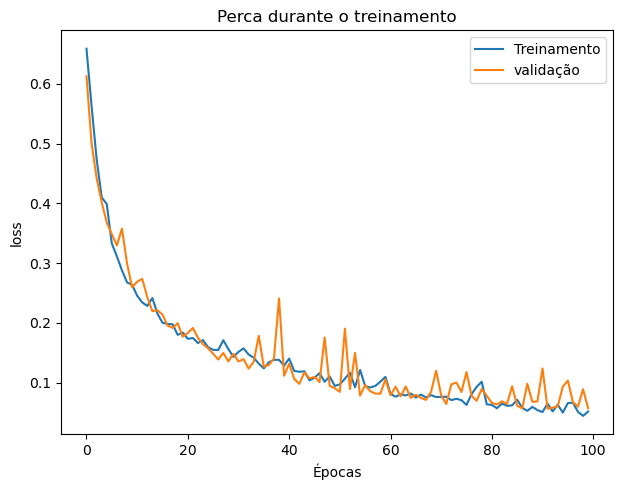

In [29]:
#grafico acuraio
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='validação')
plt.title('Acuracia do treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()


#grafico de perda
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perca durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()